In [1]:
#!pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 

In [3]:
A = np.array(X)
A[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

### 2.3.2 Compute SVD on Centered A

In [4]:
A_centered = A - np.mean(A, axis=0)

# SVD
U, S, VT = np.linalg.svd(A_centered)

# Principal components from U
u1, u2, u3 = U[:, 0], U[:, 1], U[:, 2]

### 2.3.3 Create a plot in 2D

In [5]:
y['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

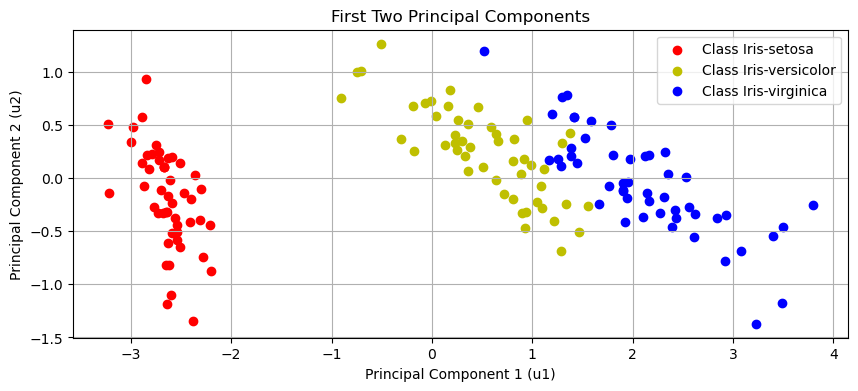

In [6]:
import matplotlib.pyplot as plt

labels  = y['class']
colors = ['r', 'y', 'b']  # One color per class
class_labels = y['class'].unique()  # Unique class labels

plt.figure(figsize=(10, 4))
for i, label in enumerate(class_labels):
    class_mask = (labels == label)
    plt.scatter(u1[class_mask]*S[0], u2[class_mask]*S[1], color=colors[i], label=f'Class {label}')

plt.title('First Two Principal Components')
plt.xlabel('Principal Component 1 (u1)')
plt.ylabel('Principal Component 2 (u2)')
plt.legend()
plt.grid(True)
plt.show()

If one only uses the first two principal components, the classes Iris-versicolor and Iris-virginica might be not fully separable. They seem to form an overlaping cluster, while Iris-setosa is separated from them.

### 2.3.4 Create Plot in 3D

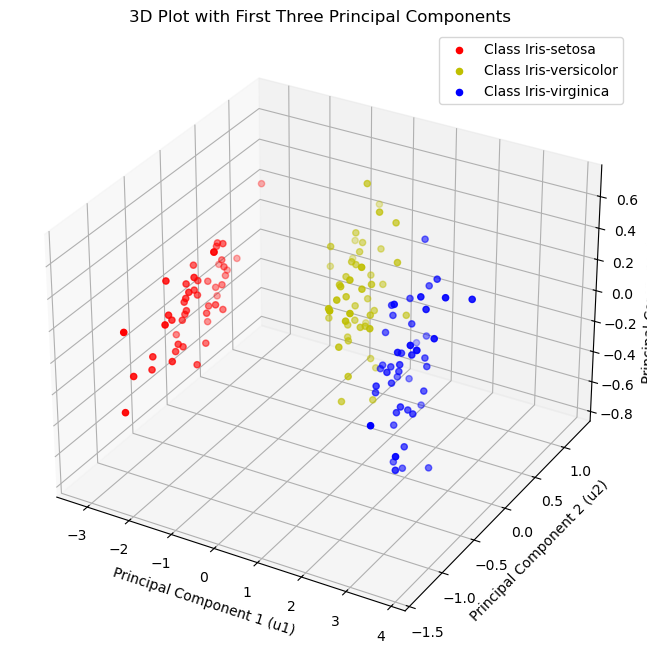

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 9))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(class_labels):
    class_mask = (labels == label)
    ax.scatter(u1[class_mask]*S[0], u2[class_mask]*S[1], u3[class_mask]*S[2], color=colors[i], label=f'Class {label}')

ax.set_title('3D Plot with First Three Principal Components')
ax.set_xlabel('Principal Component 1 (u1)')
ax.set_ylabel('Principal Component 2 (u2)')
ax.set_zlabel('Principal Component 3 (u3)')
ax.legend()
plt.show()

It seems from the perspective the plot gives, that the classes are more separable now. There might be an hyperplane that separates Iris-versicolor and Iris-virginica. And there the class Iris-setosa is again fully separated from the other two classes.